# Explore data

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [2]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Select Attributes
- For simply, consider only number-attributes

In [5]:
train_num =  train_data.copy()
train_num = train_num.select_dtypes(include=['float64', 'int64'])
train_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
attribute = ['LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'GarageCars',  'MiscVal', 'YrSold', 'LotFrontage','Fireplaces','WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice']
train_num = train_num[attribute]

In [7]:
corr_candidate = train_num.corr()['SalePrice'].sort_values(ascending=False)
print(corr_candidate)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBsmtSF      0.613581
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
LotFrontage      0.351799
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [8]:
select_attr_num = corr_candidate[abs(corr_candidate.values) > 0.3].index
select_attr_num

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [9]:
train_attr_num = train_num[select_attr_num]
train_attr_num.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF
0,208500,7,1710,2,856,2,2003,2003,0,65.0,0,61
1,181500,6,1262,2,1262,2,1976,1976,1,80.0,298,0
2,223500,7,1786,2,920,2,2001,2002,1,68.0,0,42
3,140000,7,1717,3,756,1,1915,1970,1,60.0,0,35
4,250000,8,2198,3,1145,2,2000,2000,1,84.0,192,84


array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>]], dtype=object)

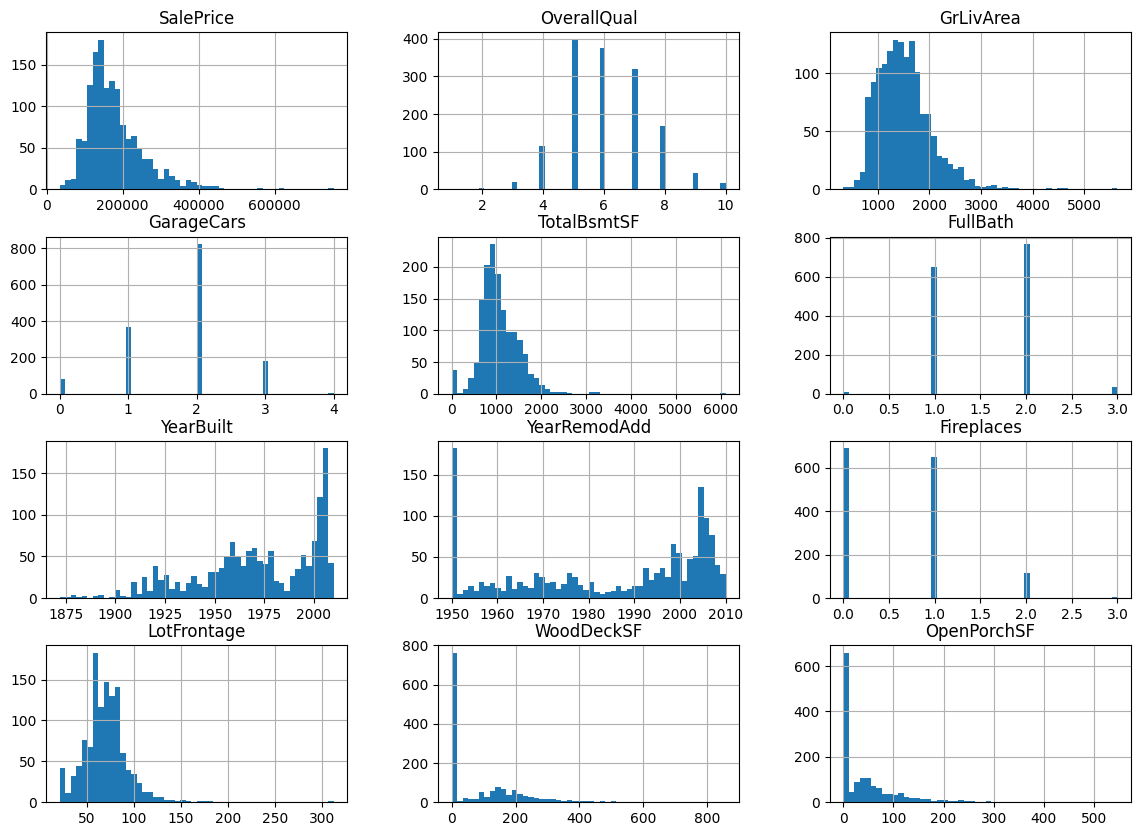

In [10]:
train_attr_num.hist(bins=50, figsize=(14,10))

 - Don't need to convert them to normal distribution.
 

# Clean Data

In [11]:
train_attr_num.isna().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
FullBath          0
YearBuilt         0
YearRemodAdd      0
Fireplaces        0
LotFrontage     259
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

Fill null with median value to 'LotFrontage' attribute.

In [12]:
train_attr_num['LotFrontage'].fillna(train_attr_num['LotFrontage'].median(), inplace=True)

/tmp/ipykernel_19/1899149328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_attr_num['LotFrontage'].fillna(train_attr_num['LotFrontage'].median(), inplace=True)
/tmp/ipykernel_19/1899149328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_attr_num['LotFrontage'].fillna(train_attr_num['LotFrontage'].median(), inplace=True)


In [13]:
train_attr_num.isna().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

Check duplicate rows

In [14]:
train_attr_num.duplicated().sum()

0

None of duplicated row

# Quick train machine learning model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train_attr_num[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF']]
y = train_attr_num['SalePrice']
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
lin_model = LinearRegression().fit(X_train, y_train)
y_pred = lin_model.predict(X_train)

In [17]:
# Evaluation
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train, y_pred, squared=False)
print('RMSE = ', RMSE)

RMSE =  36934.27623504811


In [18]:
# Compared to sd.
train_attr_num.describe() # sd. of SalePrice is 79442

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808,1984.865753,0.613014,69.863699,94.244521,46.660274
std,79442.502883,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904,20.645407,0.644666,22.027677,125.338794,66.256028
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,21.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000,1967.000000,0.000000,60.000000,0.000000,0.000000
50%,163000.000000,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000,1994.000000,1.000000,69.000000,0.000000,25.000000
75%,214000.000000,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000,2004.000000,1.000000,79.000000,168.000000,68.000000
max,755000.000000,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000,2010.000000,3.000000,313.000000,857.000000,547.000000


In [19]:
print('Score = ', lin_model.score(X_train, y_train))

Score =  0.7646752851929541


## Improve Model - Clear Outliners, Normalize

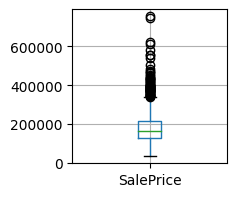

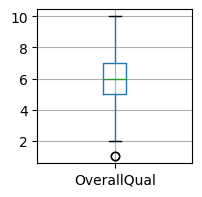

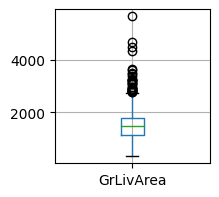

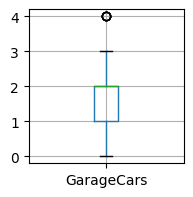

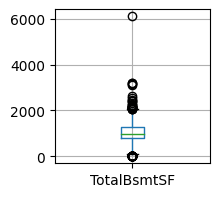

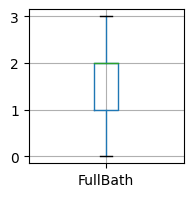

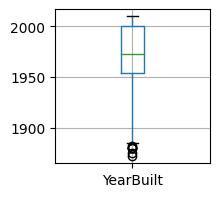

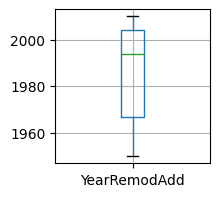

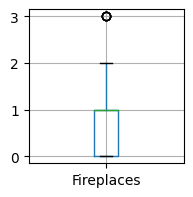

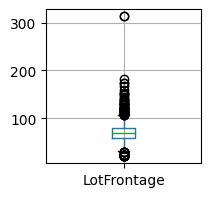

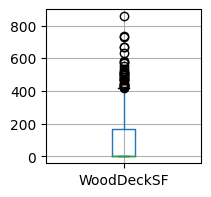

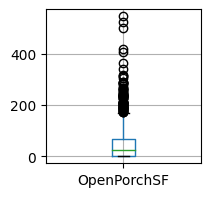

In [20]:
# Visualize box plot - Outliners 
import matplotlib.pyplot as plt
for column in train_attr_num:
    plt.figure(figsize=(2,2))
    train_attr_num.boxplot([column])

In [21]:
def filterOutliners(data, col):
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    #print('Q1 = ', Q1, ' Q3 = ', Q3)
    #print('lower_range = ', lower_range, ' upper_range = ', upper_range)
    outliner_free_list = [] #list

    outliner_free_list = [x for x in data[col] if ((x >= lower_range) & (x <= upper_range))]
    #print(len(outliner_free_list))

    #print(outliner_free_list)
    filtered_data = data[data[col].isin(outliner_free_list)] # True if this data is not an outliner
    return filtered_data

In [22]:
global filtered_train
i = 0
for col in train_attr_num.columns:
    if i == 0 :
        filtered_train = filterOutliners(train_attr_num, col)
        i += 1
    else :
        filtered_train = filterOutliners(filtered_train, col)
    print('loop @column = ', col)
    print(filtered_train.info())
    

loop @column =  SalePrice
<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1399 non-null   int64  
 1   OverallQual   1399 non-null   int64  
 2   GrLivArea     1399 non-null   int64  
 3   GarageCars    1399 non-null   int64  
 4   TotalBsmtSF   1399 non-null   int64  
 5   FullBath      1399 non-null   int64  
 6   YearBuilt     1399 non-null   int64  
 7   YearRemodAdd  1399 non-null   int64  
 8   Fireplaces    1399 non-null   int64  
 9   LotFrontage   1399 non-null   float64
 10  WoodDeckSF    1399 non-null   int64  
 11  OpenPorchSF   1399 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 142.1 KB
None
loop @column =  OverallQual
<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  ----

In [23]:
filtered_train

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF
0,208500,7,1710,2,856,2,2003,2003,0,65.0,0,61
1,181500,6,1262,2,1262,2,1976,1976,1,80.0,298,0
2,223500,7,1786,2,920,2,2001,2002,1,68.0,0,42
3,140000,7,1717,3,756,1,1915,1970,1,60.0,0,35
4,250000,8,2198,3,1145,2,2000,2000,1,84.0,192,84
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,185000,7,1221,2,1221,2,2004,2005,0,62.0,0,113
1455,175000,6,1647,2,953,2,1999,2000,1,62.0,0,40
1456,210000,6,2073,2,1542,2,1978,1988,2,85.0,349,0
1457,266500,7,2340,1,1152,2,1941,2006,2,66.0,0,60


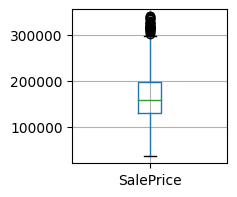

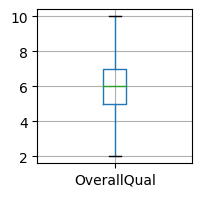

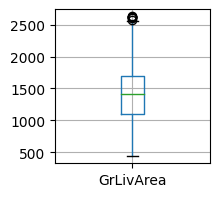

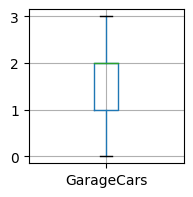

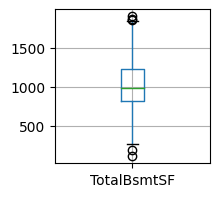

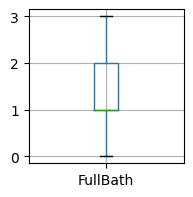

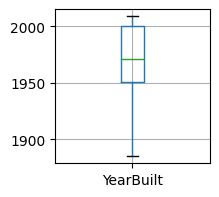

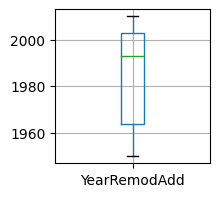

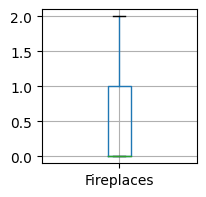

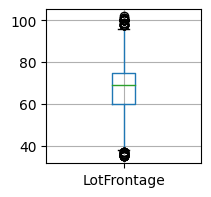

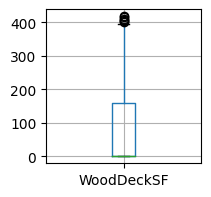

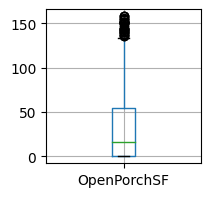

In [24]:
# Visualize box plot - Outliners 
import matplotlib.pyplot as plt
for column in filtered_train.columns:
    plt.figure(figsize=(2,2))
    filtered_train.boxplot([column])

## Scaler (Normalization)

In [25]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = filtered_train.iloc[:,1:]
y = filtered_train.iloc[:, 0]

min_max_scaler.fit(X)
#print(min_max_scaler.transform(X))
X_scaled = pd.DataFrame(min_max_scaler.transform(X), columns=X.columns)

In [26]:
X_scaled.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF
0,0.25,0.160584,0.333333,-0.166482,0.333333,0.903226,0.766667,-1.0,-0.104478,-1.000000,-0.227848
1,0.00,-0.248175,0.333333,0.284129,0.333333,0.467742,-0.133333,0.0,0.343284,0.425837,-1.000000
2,0.25,0.229927,0.333333,-0.095450,0.333333,0.870968,0.733333,0.0,-0.014925,-1.000000,-0.468354
3,0.25,0.166971,1.000000,-0.277469,-0.333333,-0.516129,-0.333333,0.0,-0.253731,-1.000000,-0.556962
4,0.50,0.605839,1.000000,0.154273,0.333333,0.854839,0.666667,0.0,0.462687,-0.081340,0.063291


## Train & Evaluate (After Removing Outliners, Normalizing)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
lin_model2 = LinearRegression().fit(X_train, y_train)
y_pred2 = lin_model2.predict(X_train)
print('Score = ', lin_model2.score(X_train,y_train))
print('RMSE = ', mean_squared_error(y_train, y_pred2, squared=False))

Score =  0.8368490653012441
RMSE =  23058.18267606375


In [28]:
Y_pred = pd.DataFrame({'y_train':y_train, 'y_pred2':y_pred2})
Y_pred.head(10)

,y_train,y_pred2
716,159500,205463.598226
467,146500,162603.074315
925,175000,137733.503531
5,143000,159526.596436
418,126000,101102.135960
730,236500,242867.088474
137,171000,233784.831886
130,226000,223026.244435
737,239900,241628.737862
1015,227000,209674.314585


Results from 2 models 
* model 1 -> fill na value with median : Score =  0.7647 RMSE =  36934.28

* model 2 -> remove outliners and normalize data with -1 to 1 range : Score = 0.8368 RMSE = 23058.18

* **So, we choose the model 2 for testing.**

## Test

In [29]:
y_pred_test = lin_model2.predict(X_test)
print('Score =', lin_model2.score(X_test, y_test))
print('RMSE = ', mean_squared_error(y_test, y_pred_test, squared=False))

Score = 0.8334189291014072
RMSE =  21874.0632799743


## For Submission

In [30]:
ID = test_data['Id']
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
# Choosing only attributes that we will use
X_test_actual = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'LotFrontage', 'WoodDeckSF',
       'OpenPorchSF']]

In [32]:
X_test_actual.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF
0,5,896,1.0,882.0,1,1961,1961,0,80.0,140,0
1,6,1329,1.0,1329.0,1,1958,1958,0,81.0,393,36
2,5,1629,2.0,928.0,2,1997,1998,1,74.0,212,34
3,6,1604,2.0,926.0,2,1998,1998,1,78.0,360,36
4,8,1280,2.0,1280.0,2,1992,1992,0,43.0,0,82


In [33]:
#scaling test data
scaler_test = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_test.fit(X_test_actual)
X_test_actual_scaled = pd.DataFrame(scaler_test.transform(X_test_actual), columns=X_test_actual.columns)

In [34]:
X_test_actual_scaled.isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        1
TotalBsmtSF       1
FullBath          0
YearBuilt         0
YearRemodAdd      0
Fireplaces        0
LotFrontage     227
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

In [35]:
X_test_actual_scaled['LotFrontage'].fillna(X_test_actual_scaled['LotFrontage'].median(), inplace=True)
X_test_actual_scaled['GarageCars'].fillna(X_test_actual_scaled['GarageCars'].median(), inplace=True)
X_test_actual_scaled['TotalBsmtSF'].fillna(X_test_actual_scaled['TotalBsmtSF'].median(), inplace=True)

/tmp/ipykernel_19/3723279220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_actual_scaled['LotFrontage'].fillna(X_test_actual_scaled['LotFrontage'].median(), inplace=True)
/tmp/ipykernel_19/3723279220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [36]:
X_test_actual_scaled.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [37]:
y_actual_pred = lin_model2.predict(X_test_actual_scaled)

In [38]:
result = pd.DataFrame({'Id':ID, 'SalePrice':y_actual_pred})
result

,Id,SalePrice
0,1461,86587.886467
1,1462,114217.677075
2,1463,128731.172399
3,1464,142395.765218
4,1465,152078.488825
...,...,...
1454,2915,70768.335274
1455,2916,75836.133107
1456,2917,124553.021398
1457,2918,101830.145590


In [39]:
result.to_csv('/kaggle/working/result.csv', index=False)